In [1]:
from sympy import *
init_printing()

In [2]:
f_01 = Function('f_01')
f_xy = Function('f_xy')

x = symbols('x')
s_x, e_x, s_y, e_y = symbols('s_x e_x s_y e_y')

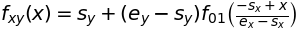

In [3]:
_f_xy = Eq(f_xy(x), (e_y-s_y)*f_01((x-s_x)/(e_x-s_x))+s_y)
_f_xy

In [4]:
Eq(_f_xy.lhs.diff(x), _f_xy.rhs.diff(x))

                          ⎛ d          ⎞│          
              (e_y - s_y)⋅⎜───(f₀₁(ξ₁))⎟│   -sₓ + x
                          ⎝dξ₁         ⎠│ξ₁=───────
d                                           eₓ - sₓ
──(f_xy(x)) = ─────────────────────────────────────
dx                           eₓ - sₓ               

---

In [5]:
O_01 = Function('O_01')
O_xy = Function('O_xy')
O_xyp = Function('O\'_xy')
G_01 = Function('G_01')
G_01p = Function('G\'_01')
G_xy = Function('G_xy')
G_xyp = Function('G\'_xy')

s_gx, e_gx, s_gy, e_gy = symbols('s_gx e_gx s_gy e_gy')
c_x, a_x = symbols('c_x a_x')

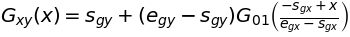

In [6]:
Eq_m_0 = Eq(G_xy(x), (e_gy-s_gy)*G_01((x-s_gx)/(e_gx-s_gx))+s_gy)
Eq_m_0

In [7]:
Eq_m_1 = Eq(diff(Eq_m_0.lhs, x), diff(Eq_m_0.rhs, x))
Eq_m_1

                            ⎛ d          ⎞│              
              (e_gy - s_gy)⋅⎜───(G₀₁(ξ₁))⎟│    -s_gx + x 
                            ⎝dξ₁         ⎠│ξ₁=───────────
d                                             e_gx - s_gx
──(G_xy(x)) = ───────────────────────────────────────────
dx                            e_gx - s_gx                

In [8]:
Eq1_0 = Eq(G_xy(c_x), O_xy(c_x))
Eq1_0

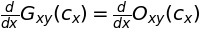

In [9]:
Eq2_0 = Eq(diff(G_xy(x), x).subs({G_xy(x):G_xy(c_x)}), diff(O_xy(x), x).subs({O_xy(x):O_xy(c_x)}))
Eq2_0

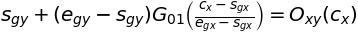

In [10]:
Eq1_1 = Eq(Eq_m_0.rhs.subs({x:c_x}), Eq1_0.rhs)
Eq1_1

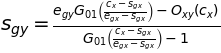

In [11]:
Eq1_2 = Eq(s_gy, solveset(Eq1_1, s_gy).args[0])
Eq1_2

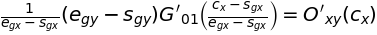

In [12]:
Eq2_1 = Eq((e_gy-s_gy)/(e_gx-s_gx)*G_01p((c_x-s_gx)/(e_gx-s_gx)), O_xyp(c_x))
Eq2_1

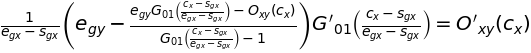

In [13]:
Eq3_0 = Eq(Eq2_1.lhs.subs({s_gy:Eq1_2.rhs}), Eq2_1.rhs)
Eq3_0

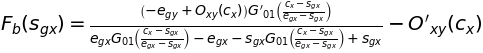

In [14]:
F_b = Function('F_b')
Eq_Bisection = Eq(F_b(s_gx), Eq3_0.simplify().rhs-Eq3_0.rhs)
Eq_Bisection

---

In [15]:
F_bn = Function('F_bn')
expr1 = (c_x-x)/(e_gx-x)
expr2 = (O_xy(c_x)-e_gy)*Derivative(G_01(x), x).subs({x:expr1})
expr3 = (e_gx-x)*(G_01(expr1)-1)
Eq_Newton = Eq(F_bn(x), expr2/expr3 - O_xyp(c_x))
Eq_Newton

                                          ⎛d         ⎞│          
                       (-e_gy + O_xy(cₓ))⋅⎜──(G₀₁(x))⎟│   cₓ - x 
                                          ⎝dx        ⎠│x=────────
                                                         e_gx - x
F_bn(x) = -O'_xy(cₓ) + ──────────────────────────────────────────
                                        ⎛   ⎛ cₓ - x ⎞    ⎞      
                             (e_gx - x)⋅⎜G₀₁⎜────────⎟ - 1⎟      
                                        ⎝   ⎝e_gx - x⎠    ⎠      

In [16]:
Eq_NewtonD = Eq(diff(Eq_Newton.lhs, x), diff(Eq_Newton.rhs, x).simplify())
Eq_NewtonD

                                ⎛                                  ⎛  2       
                                ⎜              ⎛   ⎛ cₓ - x ⎞    ⎞ ⎜ d        
              (e_gy - O_xy(cₓ))⋅⎜- (cₓ - e_gx)⋅⎜G₀₁⎜────────⎟ - 1⎟⋅⎜───(G₀₁(x)
                                ⎜              ⎝   ⎝e_gx - x⎠    ⎠ ⎜  2       
                                ⎜                                  ⎝dx        
d                               ⎝                                             
──(F_bn(x)) = ────────────────────────────────────────────────────────────────
dx                                                                            
                                                                              
                                                                              
                                                                              

 ⎞│                                                2                          
 ⎟│                         ⎛d         ⎞│          